<a href="https://colab.research.google.com/github/Aravindmurali93/ICTAC-assignment-/blob/main/Aravind_M_case_study_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv File**

In [7]:
data = pd.read_csv ('/content/Wine_clust .csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Unsupervised Learning**

<Axes: xlabel='Alcohol', ylabel='Total_Phenols'>

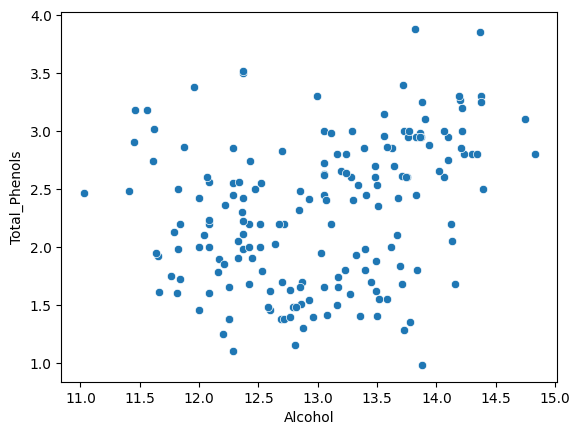

In [4]:
sns.scatterplot(x= 'Alcohol' , y='Total_Phenols' ,data=data)

In [5]:
x = data
k=3

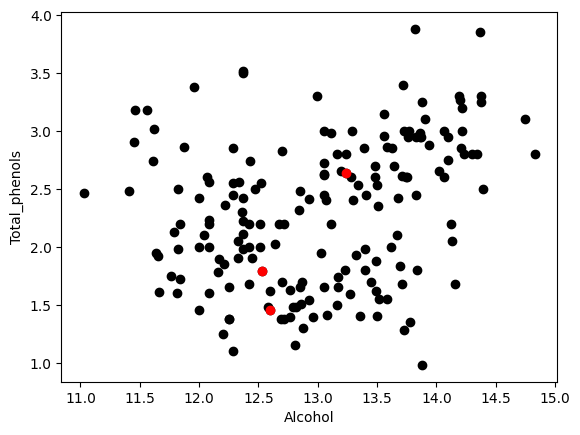

In [9]:
centroids = (x.sample(n =k))
plt.scatter(x["Alcohol"],  x['Total_Phenols'],c='black')
plt.scatter(centroids['Alcohol'], centroids['Total_Phenols'], c= 'red')
plt.xlabel('Alcohol')
plt.ylabel('Total_phenols')
plt.show()


**Kmeans Clustering**

In [17]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k , random_state=0)
x['Cluster'] =kmeans.fit_predict(x[[ 'Alcohol','Total_Phenols']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Getting the Cluster Centroid**

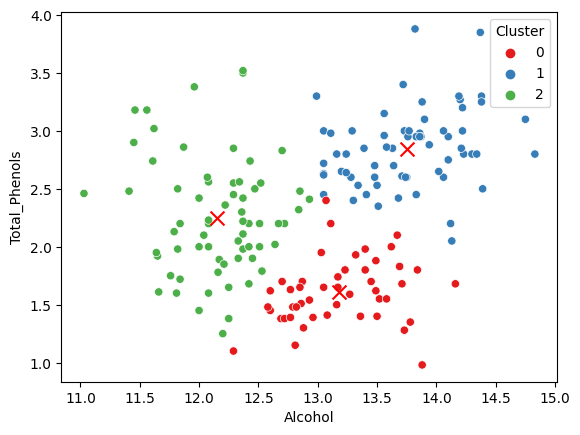

In [26]:
centroids = kmeans.cluster_centers_
sns.scatterplot(data=x , x='Alcohol' ,y='Total_Phenols',hue='Cluster', palette='Set1')
plt.scatter(centroids[:,0] ,centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

In [28]:
inertia = kmeans.inertia_
print("inertia :" ,inertia )

inertia : 58.39831216953796


In [29]:
k_range = range(1,11)
inertia_values = []

In [31]:
for k in k_range:
  kmeans =KMeans(n_clusters=k ,random_state=0)
  kmeans.fit(x[["Alcohol",'Total_Phenols']])
  inertia = kmeans.inertia_
  inertia_values.append(inertia)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Elbow Method for optimal K**

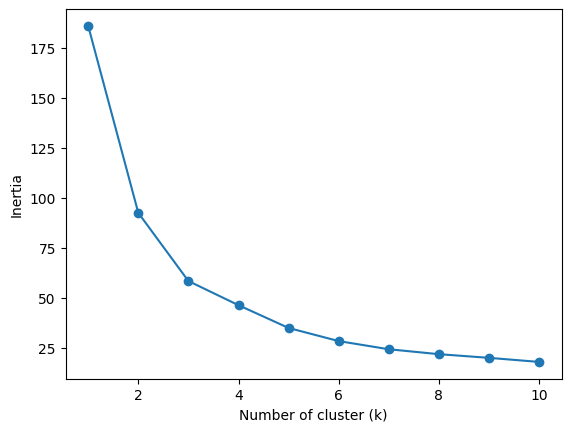

In [32]:
plt.plot(k_range, inertia_values,marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score (x[["Alcohol",'Total_Phenols' ]],x['Cluster'])
print('silhouette_score :' ,silhouette_avg)

silhouette_score : 0.43919614923122996


In [45]:
x= data.iloc[:,[0,5]]
x.head()

,Alcohol,Total_Phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80


In [46]:
import scipy.cluster.hierarchy as sch


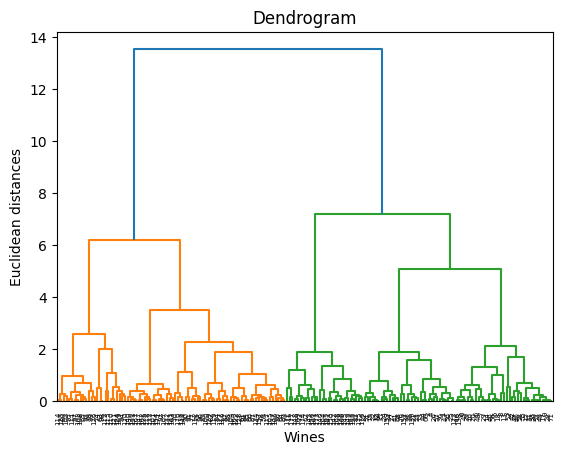

In [47]:
dendrogram =sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.show()

**Agglomerative Clusterring**

In [44]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters=3 , affinity='euclidean' ,linkage='ward')
y_hc = hc.fit_predict(x)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [48]:
x_np=x.values

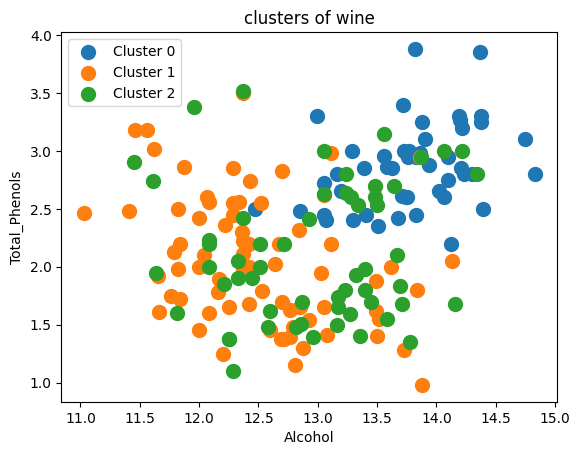

In [51]:
for cluster_label in range(3) :
     plt.scatter(x_np[y_hc== cluster_label,0],x_np[y_hc == cluster_label,1],
            s=100, label=f'Cluster {cluster_label}')
plt.title('clusters of wine')
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.legend()
plt.show()